<a href="https://colab.research.google.com/github/Emir-Emre/seleniumhq.github.io/blob/add_ide/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline 

data = pd.read_csv('Real_Combine.csv')  # Veri setimizi yüklüyoruz
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       271 non-null    float64
 1   TM      271 non-null    float64
 2   Tm      271 non-null    float64
 3   SLP     271 non-null    float64
 4   H       271 non-null    float64
 5   VV      271 non-null    float64
 6   V       271 non-null    float64
 7   VM      271 non-null    float64
 8   PM 2.5  270 non-null    float64
dtypes: float64(9)
memory usage: 19.2 KB


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


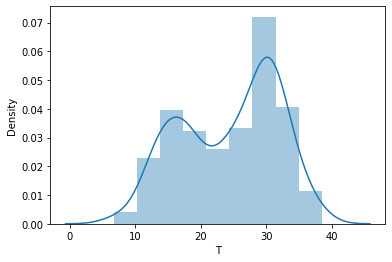

In [66]:
X = data.drop(['T'], axis=1)  #Özellik kolonumuzu seçiyoruz ve veri setinden ayırarak dağılımına bakıyoruz
y = data['T']
sns.distplot(y)
plt.show()

In [68]:
#PM 2.5 Kolonundaki eksik verileri dolduruyoruz
X['PM 2.5'] = X['PM 2.5'].fillna(X['PM 2.5'].median())

In [73]:
#Modeli eğitim veri setine ayırıp karar ağacı oluşturup fit ediyoruz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix as cm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
d_tree1 = DecisionTreeRegressor(max_depth = 3, random_state=42)
d_tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [74]:
#Gerçek değer ile tahmindeğeri arasındaki farka göre MSE yi hesapliyoruz
predictions = d_tree1.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'unit.')



Mean Absolute Error: 1.49 unit.


In [75]:
#Karar Ağacı Görselleştirme
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(d_tree1, feature_names = X.columns,
               out_file = dot_data, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07Q\x00\x00\x01\xf1\x08\x02\x00\x00\x00\xb3\xbd\xd2…

Mean Absolute Error: 1.19 unit.


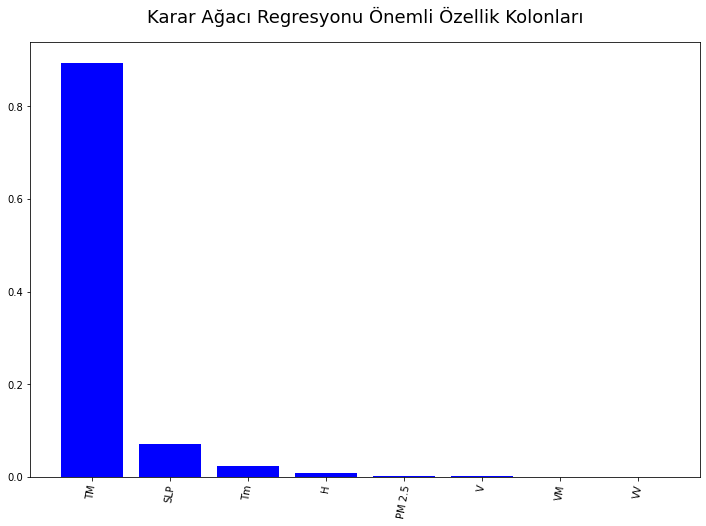

In [79]:
#Burada derinliği 8 olan yeni bir model kurup o modelin başarı oranına bakıyoruz ve 
# öznitelik sıralamasını görselleştiriyoruz
d_tree2 = DecisionTreeRegressor(max_depth = 8, random_state=42)
d_tree2.fit(X_train, y_train)
predictions = d_tree2.predict(X_test)

errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'unit.')


plt.figure(figsize=(12, 8))

ranking = d_tree2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Karar Ağacı Regresyonu Önemli Özellik Kolonları", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="blue", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()